## Imports

In [43]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import uniform, randint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import InconsistentVersionWarning

# 1. Ignore version mismatch warnings from old pickled models
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

# 2. Ignore that delayed/Parallel warning
warnings.filterwarnings(
    "ignore",
    message="`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel`"
)

# 3. Ignore sklearn FutureWarnings (like force_int_remainder_cols)
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

## Data Preprocessing and Cleaning

In [44]:
df = pd.read_csv("mlr_data.csv", keep_default_na=False)
df

,age,sex,region,urban_rural,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,total_claims_paid,chronic_count,is_high_risk,had_major_procedure,log_income,log_visits_last_year,log_days_hospitalized_last_3yrs,log_medication_count,log_proc_imaging_count,log_proc_surgery_count,log_proc_physio_count,log_proc_consult_count,log_proc_lab_count
0,52,Female,North,Suburban,Doctorate,Married,Retired,3,1,27.4,Never,Never,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,4672.59,1,0,0,10.030164,1.098612,0.0,1.609438,0.693147,0.000000,1.098612,0.000000,0.693147
1,53,Male,Central,Suburban,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1002.24,2,1,0,11.403122,1.386294,0.0,1.098612,1.098612,0.000000,0.693147,0.693147,0.000000
2,63,Female,North,Rural,HS,Single,Employed,3,2,20.4,Never,Daily,137.0,96.0,69.2,5.70,HMO,Silver,500,20,5,0,4.66,0.6923,1220.04,1,1,0,12.628070,0.693147,0.0,1.098612,0.000000,0.000000,0.000000,0.000000,0.693147
3,36,Male,West,Rural,Masters,Single,Employed,1,0,21.6,Never,Occasional,114.0,76.0,153.9,5.54,HMO,Silver,500,10,3,0,4.30,0.1978,0.00,0,0,0,10.568775,0.000000,0.0,0.000000,0.693147,0.000000,0.693147,0.000000,0.693147
4,21,Female,South,Suburban,HS,Single,Employed,3,2,30.7,Never,Weekly,82.0,64.0,189.0,7.01,HMO,Gold,2000,20,6,0,4.65,0.3187,1406.06,1,0,1,11.335006,1.386294,0.0,0.693147,1.098612,0.693147,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,50,Male,West,Urban,No HS,Married,Employed,2,0,28.2,Never,Occasional,115.0,74.0,102.5,4.98,PPO,Bronze,500,10,10,0,3.93,0.3516,0.00,0,0,0,11.753524,0.000000,0.0,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000
83823,42,Male,East,Suburban,HS,Married,Employed,2,0,27.6,Never,Occasional,101.0,66.0,177.1,5.66,PPO,Silver,5000,20,4,0,3.94,0.2637,0.00,0,0,0,9.980495,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
83824,41,Male,West,Rural,HS,Divorced,Unemployed,1,0,29.8,Former,Weekly,128.0,83.0,118.8,5.52,PPO,Gold,500,30,9,0,4.14,0.4505,2500.48,1,0,0,11.313266,2.079442,0.0,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000
83825,51,Female,South,Urban,Doctorate,Single,Unemployed,3,2,21.9,Never,Occasional,110.0,73.0,134.9,5.25,POS,Bronze,2000,20,3,0,2.76,0.5604,1104.76,1,0,0,10.678238,1.609438,0.0,1.098612,0.000000,0.000000,1.098612,1.098612,0.693147


In [21]:
df.columns

Index(['age', 'sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'household_size', 'dependents', 'bmi', 'smoker',
       'alcohol_freq', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'total_claims_paid', 'chronic_count', 'is_high_risk',
       'had_major_procedure', 'log_income', 'log_visits_last_year',
       'log_days_hospitalized_last_3yrs', 'log_medication_count',
       'log_proc_imaging_count', 'log_proc_surgery_count',
       'log_proc_physio_count', 'log_proc_consult_count',
       'log_proc_lab_count'],
      dtype='object')

## Baseline Linear Regression Model

### 1. Define input features and target
### 2. Transform the input features
### 3. Train-test Split

In [50]:
target = "total_claims_paid"

# Use log target to stabilize variance
y = np.log1p(df[target])
X = df.drop([target], axis=1)

numeric_cols = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OLS Regression


Train Metrics
MAE:  $1,691.52
RMSE: $13,963.65
R²:   -40.0393

Test Metrics
MAE:  $1,682.75
RMSE: $9,227.87
R²:   -16.3925


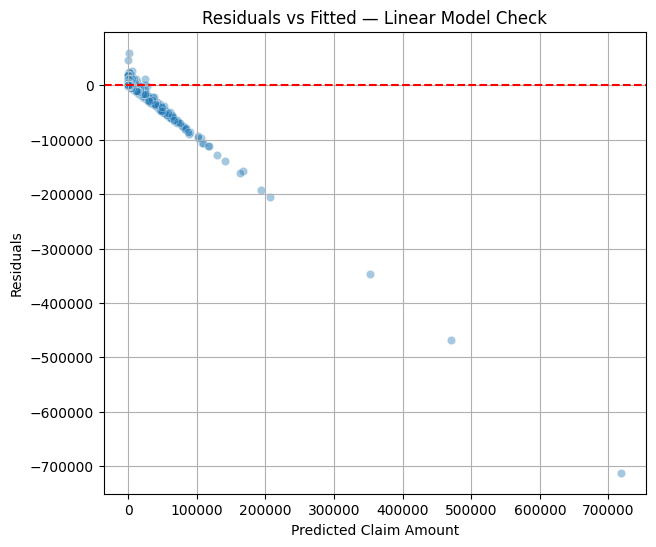

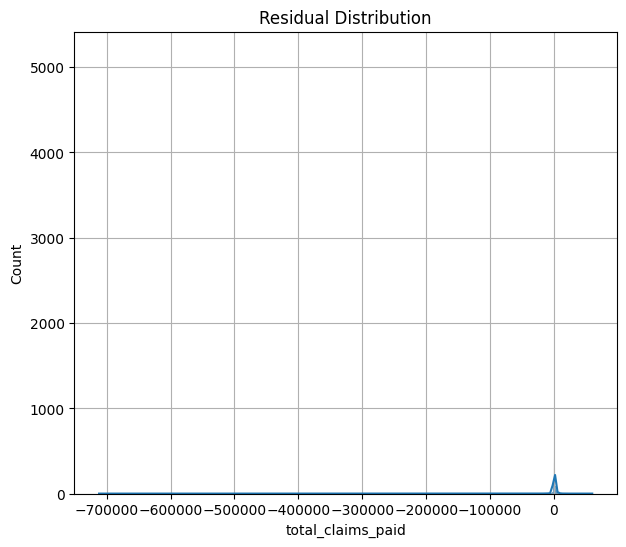

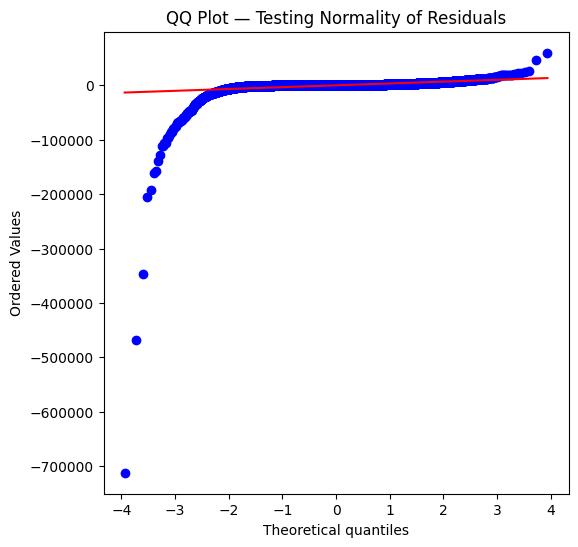

In [51]:
mlr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("linear_regression", LinearRegression())
])

mlr_model.fit(X_train, y_train)

y_train_pred = np.expm1(mlr_model.predict(X_train))
y_test_pred  = np.expm1(mlr_model.predict(X_test))

y_train_actual = np.expm1(y_train)
y_test_actual  = np.expm1(y_test)


def print_metrics(name, actual, pred):
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    r2 = r2_score(actual, pred)
    print(f"\n{name} Metrics")
    print(f"MAE:  ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R²:   {r2:.4f}")


print_metrics("Train", y_train_actual, y_train_pred)
print_metrics("Test", y_test_actual, y_test_pred)


# Residuals
residuals = y_test_actual - y_test_pred

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted — Linear Model Check")
plt.xlabel("Predicted Claim Amount")
plt.ylabel("Residuals")
plt.grid()
plt.show()

# Histogram
plt.figure(figsize=(7,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.grid()
plt.show()

# QQ plot
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot — Testing Normality of Residuals")
plt.show()


In [52]:
model = mlr_model.named_steps['linear_regression']

# Get the coefficients (array of slopes for each feature)
coefficients = model.coef_

# Get the intercept (B0 value)
intercept = float(model.intercept_)

coef_df = pd.DataFrame({
    "feature": preprocessor.get_feature_names_out(),
    "coef": coefficients
}).sort_values("coef", key=abs, ascending=False)

intercept

4.477355532833271

In [49]:
coef_df.head(20)

,feature,coef
18,num__log_visits_last_year,2.266614
13,num__risk_score,0.256544
45,cat__smoker_Former,0.138503
48,cat__alcohol_freq_Occasional,-0.105969
27,cat__sex_Other,0.105094
47,cat__alcohol_freq_Never,-0.099733
0,num__age,-0.096246
49,cat__alcohol_freq_Weekly,-0.087154
51,cat__plan_type_POS,0.084780
14,num__chronic_count,0.078812
